In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel

import bayesopt

In [2]:
def func(x):
    return np.cos(2*x)

def grad_func(x,noise):
    return -2*np.sin(2*x) + noise*np.random.randn(*x.shape)

In [3]:
bounds = np.array([[0.0], [np.pi/2]])

noise = 0.1

num_init_points = 2
num_gridpoints = 101

max_iterations = 10
max_std_err = 1e-3

In [4]:
X_init = np.random.uniform(bounds[0],bounds[1],num_init_points).reshape(-1,1)
Y_init = grad_func(X_init,noise)

grid = np.linspace(bounds[0],bounds[1],num_gridpoints)

In [5]:
kernel = RBF()
# kernel = ConstantKernel(1.0) * Matern(length_scale=1.0, nu=2.5)
gpr = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=50,alpha=noise**2)

In [6]:
means_iter, stds_iter = bayesopt.optimize_var(X_init,Y_init,gpr,grad_func,grid,noise=noise)

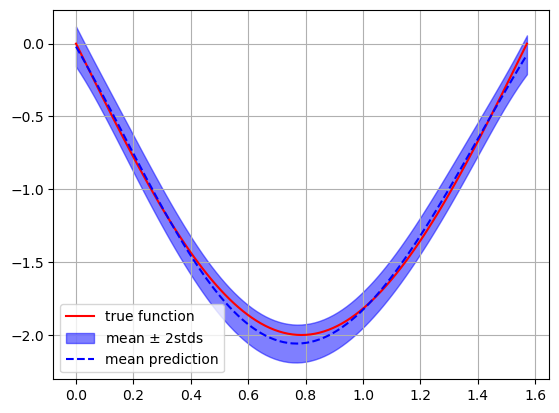

In [7]:
means = means_iter[-1]
stds = stds_iter[-1]

plt.plot(grid,grad_func(grid,0),"r",label="true function")
plt.fill_between(grid[:,0],means-2*stds,means+2*stds,color="b",alpha=0.5, label="mean $\pm$ 2stds")
plt.plot(grid,means,"b--",label="mean prediction")
plt.legend()
plt.grid()

## Plotting the iteration process of the GPR

In [8]:
# for i,(feature,label) in enumerate(zip(features[num_init_points:],labels[num_init_points:])):
#     f, ax = plt.subplots(1,2)
#     ax[0].fill_between(grid[:,0], means_iter[i]-stds_iter[i], means_iter[i]+stds_iter[i],alpha=0.5)
#     ax[0].plot(grid,means_iter[i])
#     ax[0].scatter(features[:i+num_init_points],labels[:i+num_init_points],label="current points")
#     ax[0].scatter(feature,label,label="next point")
#     ax[0].legend()
#     ax[0].grid()

#     ax[1].plot(grid,stds_iter[i])